# Tesnorflow Scratchpad

## Regression
Trying to reproduce sine


In [9]:
# Tensorflow Linear regression 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class Regression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (Regression)
        self.ypred = ypred  = tf.add(tf.mul(X, W), b)
        #defining the cost of 
        self.cost = tf.reduce_sum(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(100):
                final_y = []
                for (x, y) in zip(trX, trY):
                    self.sess.run(op, feed_dict={self.X: [[x]], self.Y: [[y]]})
                    c = self.sess.run(self.cost, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    costs.append(np.max(c))
                    final_y.append(yf)
                avg_cost.append(np.mean(costs))
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(2,figsize=(20,10))
            axarr[0].plot(avg_cost)
            axarr[0].set_title('Cost and Prediction Plot')
            axarr[0].set_xlabel("iteration")
            axarr[1].scatter(trX, final_y)
            axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)    

In [68]:
trX = np.linspace(-2, 2, 200)
#trY = 2 * trX + np.random.randn(*trX.shape) * 0.33
# Adding some noise
trY = np.sin(trX)+ np.random.randn(*trX.shape) * 0.66

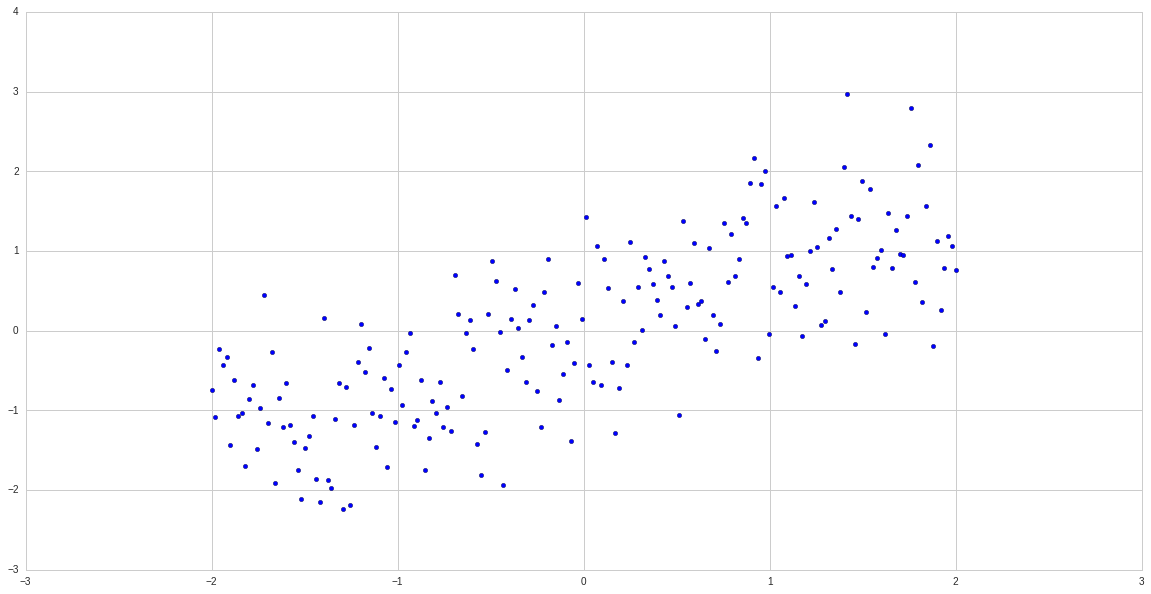

In [11]:
%matplotlib inline
plt.figure(figsize=(20,10)) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.scatter(trX,trY)

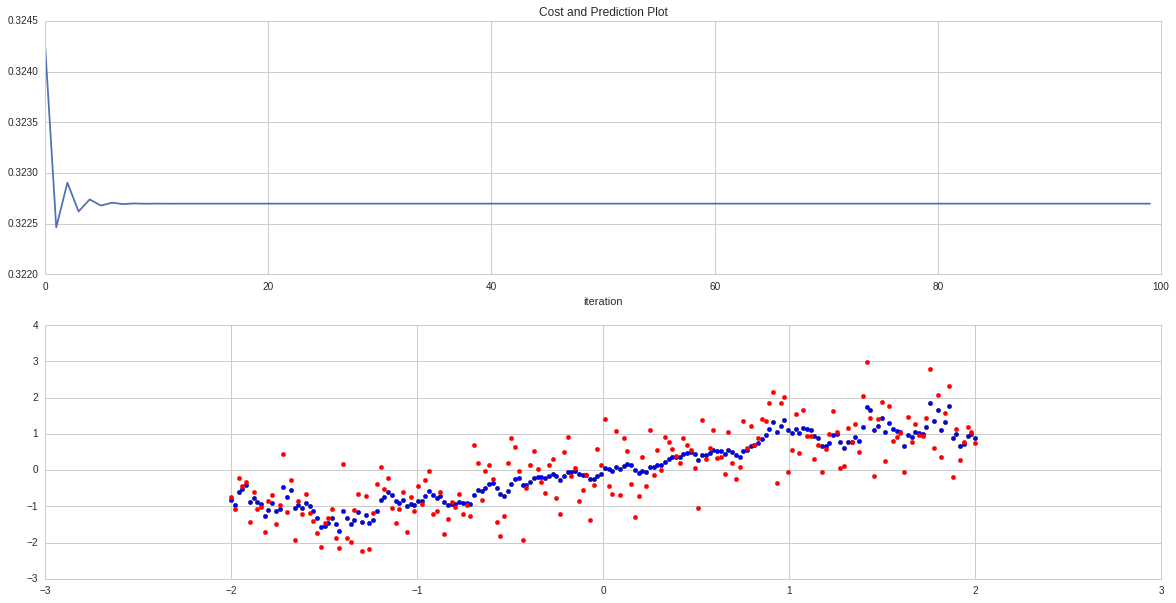

In [13]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
reg = Regression(1,1)

reg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY)

## Logistic Regression
Using MNIST dataset

In [65]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class LogisticRegression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
        #defining the cost of 
        self.cost = tf.reduce_mean(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y,n_iter,n_batchsize):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(n_iter):
                final_y = []
                j = 0
                for (start, end) in zip(range(0,len(trX),n_batchsize), range(n_batchsize,len(trX),n_batchsize)):
                    j = j+1
                    self.sess.run(op, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    c = self.sess.run(self.cost, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    costs.append(np.mean(c))
                    final_y.append(yf)
                    
                avg_cost.append(np.mean(costs))
                if(i %100 == 0):
                    print i," iteration : Mean cost",np.mean(costs)
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(1,figsize=(20,10))
            axarr.plot(avg_cost)
            axarr.set_title('Cost and Prediction Plot')
            axarr.set_xlabel("iteration")
            #axarr[1].scatter(trX, final_y)
            #axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)   

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
trX, trY, teX, teY = mnist.train.images[:5000], mnist.train.labels[:5000], mnist.test.images, mnist.test.labels

0  iteration : Mean cost 0.0895251
100  iteration : Mean cost 0.0507796
200  iteration : Mean cost 0.0361848
300  iteration : Mean cost 0.0293383
400  iteration : Mean cost 0.0256177
500  iteration : Mean cost 0.0233001
600  iteration : Mean cost 0.0217004
700  iteration : Mean cost 0.0205146
800  iteration : Mean cost 0.0195887
900  iteration : Mean cost 0.0188375
1000  iteration : Mean cost 0.0182102
1100  iteration : Mean cost 0.0176745
1200  iteration : Mean cost 0.017209
1300  iteration : Mean cost 0.0167987
1400  iteration : Mean cost 0.0164327
1500  iteration : Mean cost 0.0161031
1600  iteration : Mean cost 0.0158037
1700  iteration : Mean cost 0.0155298
1800  iteration : Mean cost 0.0152775
1900  iteration : Mean cost 0.015044
2000  iteration : Mean cost 0.0148266
2100  iteration : Mean cost 0.0146236
2200  iteration : Mean cost 0.0144331
2300  iteration : Mean cost 0.0142538
2400  iteration : Mean cost 0.0140844
2500  iteration : Mean cost 0.0139241
2600  iteration : Mean cos

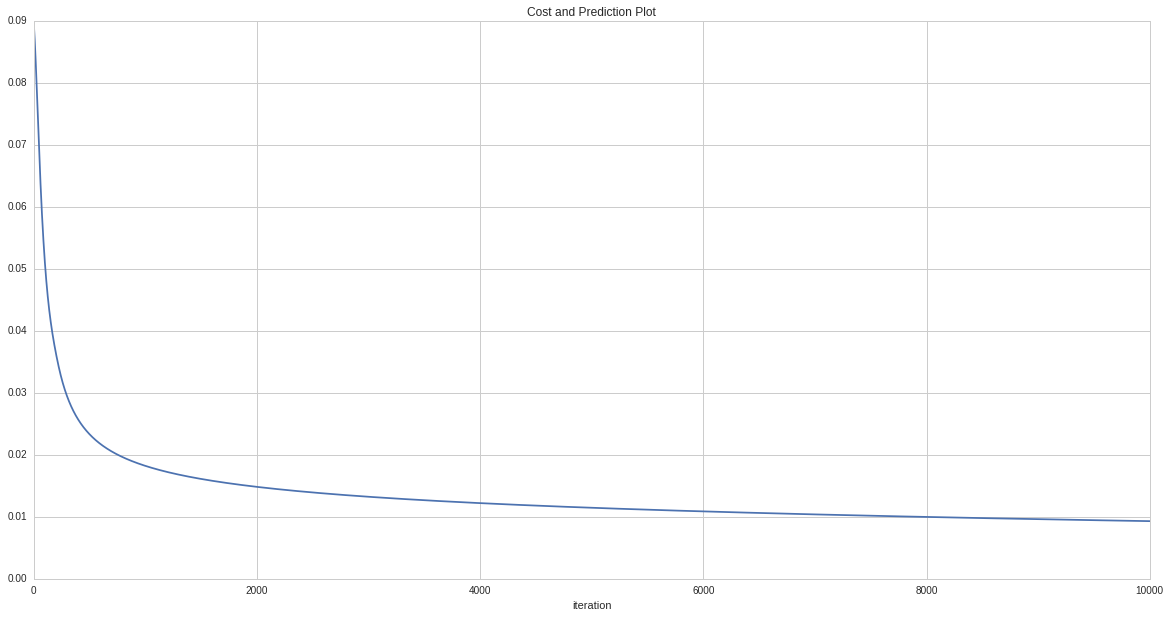

In [67]:
ops.reset_default_graph()
lreg = LogisticRegression(784,10)
lreg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY,10000,400)

Simple example of mean by axis

In [86]:
a = [[1,2,3]]
b = [[2,3,4]]
ap = tf.placeholder("float32", [1, 3])
bp = tf.placeholder("float32", [1, 3])
c = tf.reduce_sum(tf.mul(ap, bp))
with tf.Session() as sess:
    print sess.run(c, feed_dict={ap: a,bp:b})

20.0


## Reinforce Algorithm

This uses the softmax for actions works with gym environment. Currently, for discrete action space

In [653]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class ReinforceDiscreteAgent(object):
    def __init__(self,env):
        n_input = env.observation_space.shape[0]
        n_output = env.action_space.n
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input],name="Input") # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output], name="Action")
        self.r = r = tf.placeholder("float32",[None,1],name="Reward")
        H = 3
        # Variables
        shape = [n_input,H]
        shape_bias = [1,n_output]
        
        self.W1 = W1 = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        self.layer1 = layer1 = tf.nn.tanh(tf.matmul(X,W1))
        self.W2 =W2 = tf.Variable(tf.random_normal([H,n_output], stddev=0.01),name="W2" )
        
        #small value 
        epsilon =1e-8 
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(layer1, W2), b))
        self.tvars = tf.trainable_variables()
        #self.grad = tf.gradients()
        #defining the gradient 
        self.loss = -tf.reduce_mean(tf.mul(tf.mul(tf.log(ypred+epsilon),Y),r),1)
        self.sess.run(tf.initialize_all_variables())
        #self.grads = tf.gradients(loss,tvars)
        
    
    def learn(self,optimizer,learning_rate,states,actions,returns,n_iter,n_batchsize):
            
        op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)
        self.sess.run(tf.initialize_all_variables())
        costs = []
        avg_cost = []
        
        for (start, end) in zip(range(0,len(states),n_batchsize), range(n_batchsize,len(states),n_batchsize)):
            j = j+1
            #g_and_v = op.compute_gradients(self.loss)
            #op.apply_gradients(g_and_v)
            self.sess.run(op, feed_dict={self.X: states[start:end], self.Y: actions[start:end]
                                        , self.r: returns[start:end]})
                

            l = self.sess.run(self.loss, feed_dict={self.X: states[start:end], self.Y: actions[start:end]
                                        , self.r: returns[start:end]})
            
            
    def collect_trajectories(self,env,horizon,n_trajectories = 20):
         # starting state
        gamma = 0.99
        
        T = horizon
        states = []
        actions = []
        returns = []
        total_reward = 0
        trajectories = []
        
        for episodes in range(n_trajectories):
            env_history = []
            #tau = []
            done = 0
            t = 0
            obs = env.reset()
            observation = obs
            while done == 0 and t < T-1:
                action = self.act(observation) # Agent
                observation, reward, done, info = env.step(action)
                onehot_action = np.zeros(env.action_space.n)
                onehot_action[action] = 1
                env_history.append((observation,onehot_action,reward))
                t = t + 1
                if done:
                    total_reward = total_reward+t+1
                    #print("Episode finished after {} timesteps".format(t+1))
                    break

            for idx in range(len(env_history)):
                states.append( env_history[idx][0])
                actions.append(env_history[idx][1])
                returns.append( [np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ])
                trajectories.append((env_history[idx][0],env_history[idx][1],[np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ]))
            #trajectories.append(tau)
        tr = np.random.permutation( trajectories)
        states_pr = [t[0] for t in tr ]
        actions_pr = [t[1] for t in tr ]
        returns_pr = [t[2] for t in tr ]
    
        print "Total reward",total_reward
        return states_pr,actions_pr,returns_pr,total_reward
        
    
    
    def act(self,obs):
        #with self.sess as sess:
        tf.initialize_all_variables()
        ypred = self.sess.run(self.ypred,feed_dict={self.X : [obs]})
        #print ypred
        if(ypred[0][0]>ypred[0][1]):
            return 1
        else:
            return 0
            
            

In [654]:
opt = tf.train.GradientDescentOptimizer(0.01)


[2016-08-24 11:56:04,336] Making new env: CartPole-v0


Total reward 205
Total reward 990
Total reward 916
Total reward 934
Total reward 829
Total reward 779
Total reward 771
Total reward 681
Total reward 700
Total reward 737
Total reward 762
Total reward 756
Total reward 693
Total reward 704
Total reward 661
Total reward 679
Total reward 625
Total reward 620
Total reward 659
Total reward 618


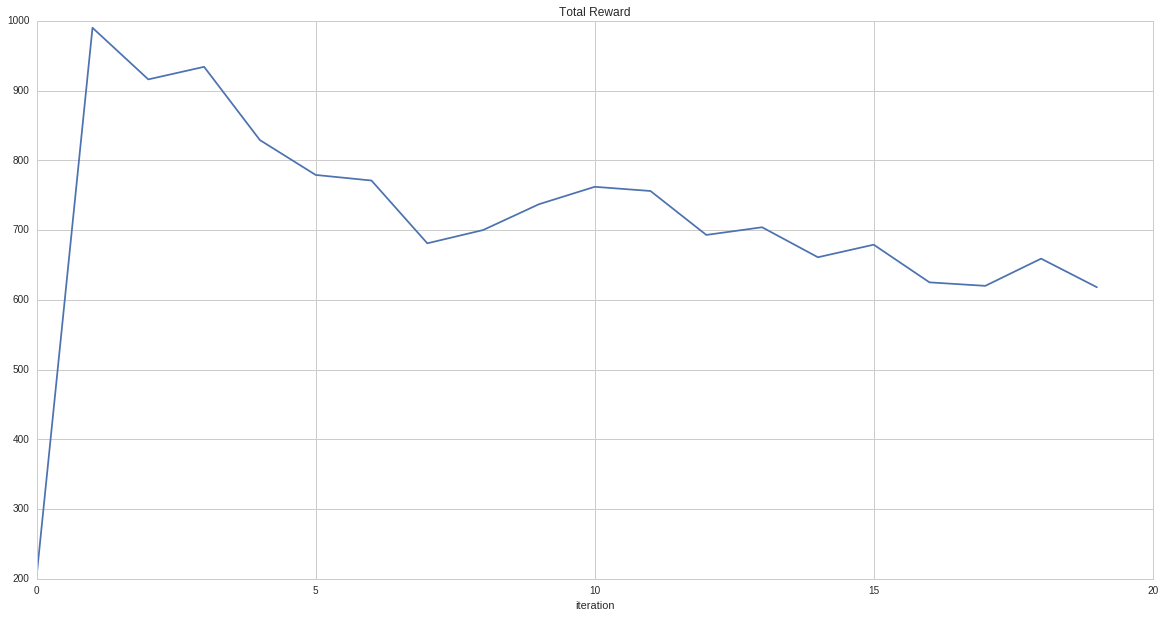

In [660]:
import gym
from tensorflow.python.framework import ops
ops.reset_default_graph()
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)
rs = []
for i in range(20):
    states,actions,returns,total_reward = rf.collect_trajectories(env,200)
    rf.learn(opt,0.01,states,actions,returns,n_iter=100,n_batchsize=100)
    states = None
    actions = None
    returns = None
    rs.append(total_reward)
plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(1,figsize=(20,10))
axarr.plot(rs)
axarr.set_title('Total Reward')
axarr.set_xlabel("iteration")

In [ ]:
import gym
from tensorflow.python.framework import ops
ops.reset_default_graph()
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)
rs = []
for i in range(10):
    states,actions,returns,total_reward = rf.collect_trajectories(env,100)
    rf.learn(opt,0.01,states,actions,returns,100,20)
    states = None
    actions = None
    returns = None
    rs.append(total_reward)
plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(1,figsize=(20,10))
axarr.plot(rs)
axarr.set_title('Total Reward')
axarr.set_xlabel("iteration")

In [217]:
 # Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class ReinforceDiscreteAgent(object):
    def __init__(self,env):
        n_input = env.observation_space.shape[0]
        n_output = env.action_space.n
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input],name="Input") # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output], name="Action")
        self.r = r = tf.placeholder("float32",[None,1],name="Reward")
        H = 3
        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        
        self.W1 = W1 = tf.Variable(tf.ones(shape),name="weight")
        self.b = b = tf.Variable(tf.ones(shape_bias),name="b")
        #self.layer1 = layer1 = tf.nn.tanh(tf.matmul(X,W1))
        #self.W2 =W2 = tf.Variable(tf.random_normal([H,n_output], stddev=0.01),name="W2" )
        
        #small value 
        epsilon =1e-8
        self.phi = tf.matmul(X,W1)
        self.ypred = tf.nn.softmax(self.phi)#-tf.expand_dims(tf.reduce_max(self.phi,1),1))
        self.loss = -tf.reduce_mean(tf.reduce_sum(tf.mul(tf.mul(tf.log(self.ypred),Y),r),1))
        
#         # prediction (with softmax)
#         self.phi = phi = tf.matmul(X, W1)
#         self.phi_norm = phi#-tf.expand_dims( tf.reduce_max(phi,reduction_indices=[1]),1)
#         self.ypred = ypred  = tf.nn.softmax(phi)
#         self.tvars = tf.trainable_variables()
#         self.phi_mean = tf.reduce_mean(self.phi_norm,1) # shape = (x,)
#         self.phi_mean = tf.expand_dims(self.phi_mean, 1)                            # shape = (x, 1)
#         self.sum_mul = sum_mul = tf.mul(self.phi_norm,Y)
#         # Loss 
#         self.r_mul = r_mul =  tf.mul(sum_mul,r)
#         self.sum_av = tf.reduce_sum(r_mul,1)
#         self.loss = -tf.reduce_mean(self.sum_av)
        learning_rate = 0.01
        self.op = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.loss)
        #self.gradients = self.op.compute_gradients(self.loss)
        #self.train_op = self.op.apply_gradients(self.gradients)
        self.sess.run(tf.initialize_all_variables())
        
    
    def learn(self,optimizer,learning_rate,states,actions,returns,n_batchsize):
        l = self.sess.run(self.loss,feed_dict = {self.X: states, self.Y: actions
                                       , self.r: returns})
        self.sess.run(self.op,feed_dict = {self.X: states, self.Y: actions
                                       , self.r: returns})
        return l
       
            
            
            
    def collect_trajectories(self,env,horizon,n_trajectories = 1):
         # starting state
        gamma = 0.99
        
        T = horizon
        states = []
        actions = []
        returns = []
        total_reward = 0
        trajectories = []
        re = []
        
        for episodes in range(n_trajectories):
            env_history = []
            #tau = []
            done = 0
            t = 0
            observation_old = env.reset()
            while done == 0 and t < T-1:
                action = self.act(observation_old) # Agent
                observation, reward, done, info = env.step(action)
                onehot_action = np.zeros(env.action_space.n)
                onehot_action[action] = 1
                env_history.append((observation_old,onehot_action,reward))
                observation_old = observation
                t = t + 1
                if done:
                    re.append(t+1)
                    total_reward = total_reward+t+1
                    #print("Episode finished after {} timesteps".format(t+1))
                    break

            for idx in range(len(env_history)):
                states.append( env_history[idx][0])
                actions.append(env_history[idx][1])
                returns.append( [np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ])
                trajectories.append((env_history[idx][0],env_history[idx][1],[np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ]))
    
        
        #print states
        #print actions
        #print returns
        #print np.max(re),np.mean(re)
        return states,actions,returns,1.0*total_reward/n_trajectories
        
    
    
    def act(self,obs):
        #with self.sess as sess:
        #tf.initialize_all_variables()
        ypred = self.sess.run(self.ypred,feed_dict={self.X : [obs]})
        #print ypred
        ac = np.random.multinomial(1,ypred[0])
        return ac.tolist().index(1)
        

[2016-08-29 07:47:57,901] Making new env: CartPole-v0


Loss 4.34431 Iteration 0 Average reward 13.0
Loss 8.33877 Iteration 10 Average reward 26.0
Loss 6.84461 Iteration 20 Average reward 21.0
Loss 5.02134 Iteration 30 Average reward 15.0
Loss 3.3232 Iteration 40 Average reward 10.0
Loss 6.29383 Iteration 50 Average reward 19.0
Loss 10.6669 Iteration 60 Average reward 34.0
Loss 3.72906 Iteration 70 Average reward 11.0
Loss 4.07415 Iteration 80 Average reward 12.0
Loss 10.7816 Iteration 90 Average reward 35.0
Loss 6.77305 Iteration 100 Average reward 21.0
Loss 24.0542 Iteration 110 Average reward 94.0
Loss 5.16854 Iteration 120 Average reward 15.0
Loss 10.6459 Iteration 130 Average reward 35.0
Loss 5.87394 Iteration 140 Average reward 18.0
Loss 9.43225 Iteration 150 Average reward 31.0
Loss 22.5004 Iteration 160 Average reward 88.0
Loss 4.79045 Iteration 170 Average reward 13.0
Loss 9.84728 Iteration 180 Average reward 33.0
Loss 14.6099 Iteration 190 Average reward 52.0
Loss 23.8512 Iteration 200 Average reward 96.0
Loss 6.85219 Iteration 21

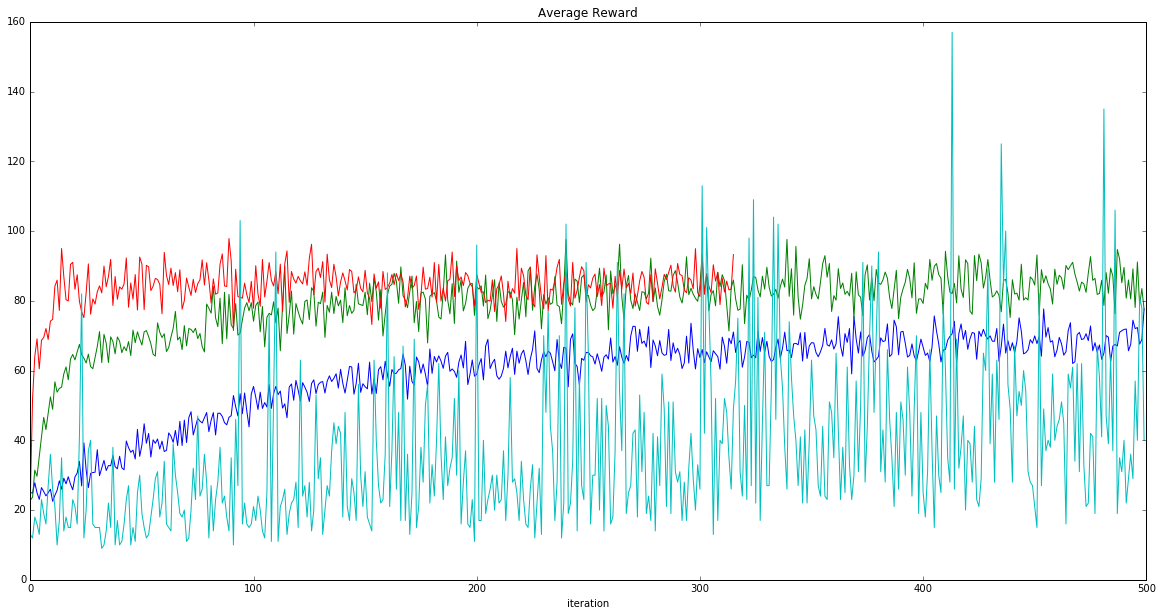

[2016-08-26 14:10:04,615] Making new env: CartPole-v0


Loss 0.0103089 Iteration 0 Average reward 25.98
Loss -148.507 Iteration 10 Average reward 76.32
Loss -349.693 Iteration 20 Average reward 83.42
Loss -589.767 Iteration 30 Average reward 81.38
Loss -802.143 Iteration 40 Average reward 88.92
Loss -871.612 Iteration 50 Average reward 76.9
Loss -1218.93 Iteration 60 Average reward 88.1
Loss -1450.37 Iteration 70 Average reward 94.28
Loss -1526.62 Iteration 80 Average reward 83.88
Loss -1573.28 Iteration 90 Average reward 75.62
Loss -2097.41 Iteration 100 Average reward 95.04
Loss -2167.47 Iteration 110 Average reward 87.76
Loss -2356.69 Iteration 120 Average reward 86.94
Loss -2648.48 Iteration 130 Average reward 87.88
Loss -2748.56 Iteration 140 Average reward 84.44
Loss -3005.42 Iteration 150 Average reward 83.96
Loss -3047.16 Iteration 160 Average reward 83.98
Loss -3036.15 Iteration 170 Average reward 78.42
Loss -3635.07 Iteration 180 Average reward 90.46
Loss -3979.58 Iteration 190 Average reward 96.64
Loss -3530.56 Iteration 200 Aver

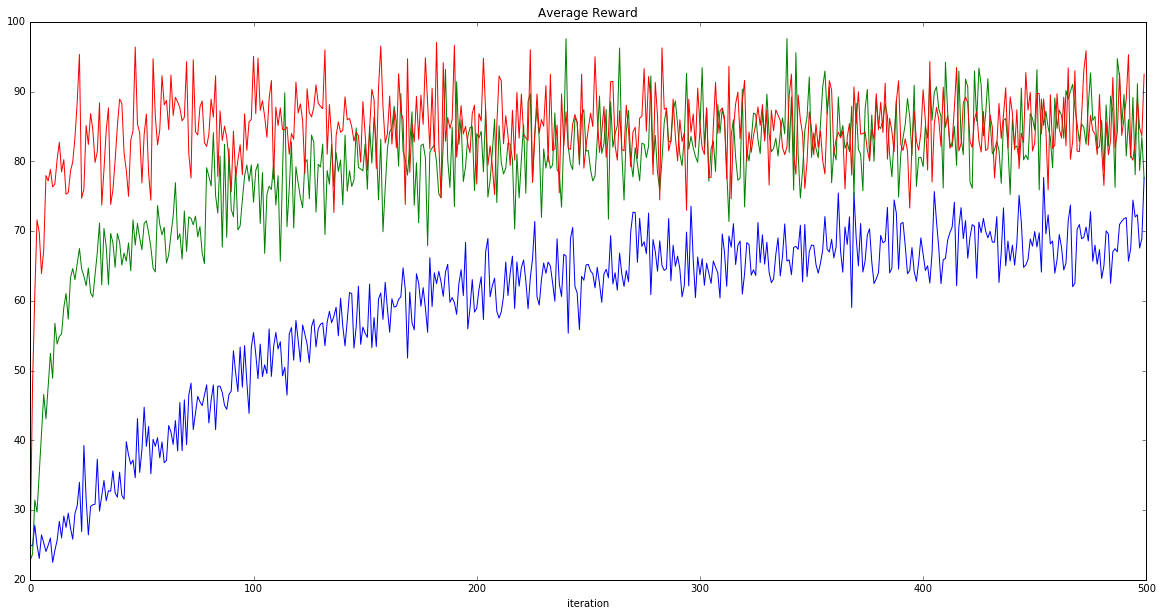

In [124]:
import gym
import time
%matplotlib inline 
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)
rs3 = []
for i in range(500):
    #env = gym.make('CartPole-v0')
    start_time = time.clock()
    states,actions,returns,total_reward = rf.collect_trajectories(env,200)
    #print time.clock() - start_time, "seconds in trajectories"
    start_time = time.clock()
    l = rf.learn(None,0.01,states,actions,returns,20)
    if(i%10 == 0):
        print "Loss",l, "Iteration",i, "Average reward",total_reward
    #print time.clock() - start_time, "seconds in RL Learn"
    states = None
    actions = None
    returns = None
    rs3.append(total_reward)
    env.close()
plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(1,figsize=(20,10))
axarr.plot(rs)
axarr.plot(rs2)
axarr.plot(rs3)
axarr.set_title('Average Reward')
axarr.set_xlabel("iteration")